In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[1])
circuit.barrier(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[1])
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.x(qreg_q[1])
circuit.barrier(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
from qiskit.quantum_info import Statevector
Statevector(circuit).draw("latex")

<IPython.core.display.Latex object>

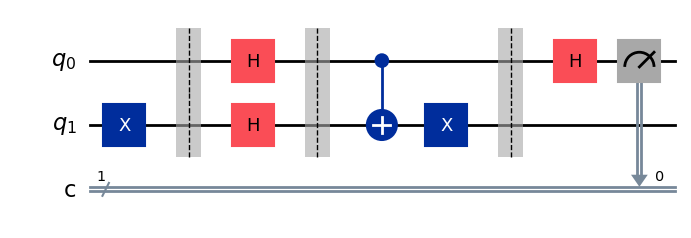

In [2]:
circuit.measure(qreg_q[0], creg_c[0])
circuit.draw("mpl")

{1: 1.0}


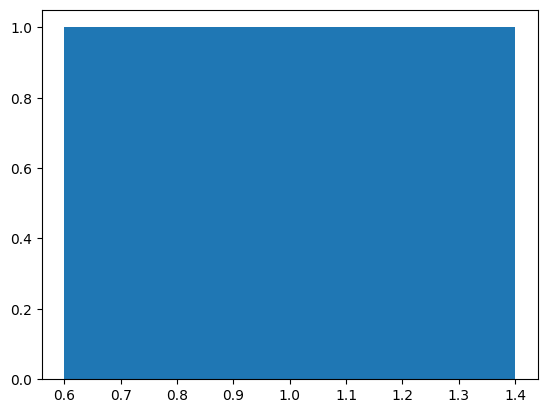

In [3]:
from qiskit_aer.primitives import Sampler
quasi_dists = Sampler().run(circuit, shots=1024).result().quasi_dists[0]
print(quasi_dists)
from matplotlib.pyplot import bar, show
bar(quasi_dists.keys(), quasi_dists.values())
show()

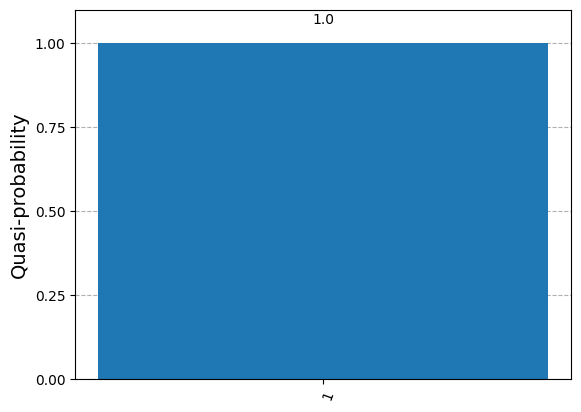

In [4]:
from qiskit.visualization import plot_histogram
plot_histogram(quasi_dists)